In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
%matplotlib inline

from model import NN

In [2]:
def generate_ellipse(max_num = 10000, scale=(0.5,0.2)):
    data = (torch.rand((max_num,2))-0.5)*2
    dist = torch.sum(torch.square(data),axis=1)
    data = data[torch.where(dist <= 1)]
    data *= torch.tensor(scale)
    return data

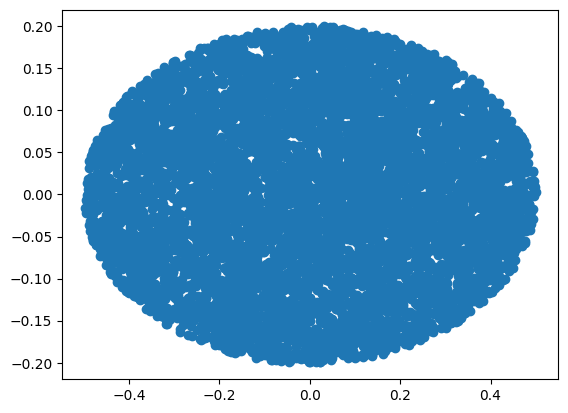

In [3]:
train_loader = generate_ellipse(max_num=10000, scale=(0.5,0.2))
plt.scatter(np.array(train_loader)[:,0], np.array(train_loader)[:,1])

In [4]:
torch.set_default_dtype(torch.float32)
torch.manual_seed(2)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cuda', index=0)

In [5]:
torch.manual_seed(0)

testNN = NN(num_lu_blocks=10,layer_size=2).to(device)

In [6]:
from torch.optim.lr_scheduler import StepLR

optimizer = torch.optim.SGD(testNN.parameters(), lr=1, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.98)

In [7]:
from train import training_routine_uniform
from functions import uniform_circle_loss_function

In [8]:
%%time

num_epoch = 20
batch_size = 128
for epoch in range(num_epoch):
    density_param = (1+epoch, 0.2)
    training_routine_uniform(testNN, device, train_loader, optimizer, epoch, batch_size, uniform_circle_loss_function, density_param) 

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:02<00:00, 23.81it/s]

CPU times: total: 47.8 s
Wall time: 48.1 s


In [9]:
from visuals import plot_generating_uniform_density, compute_uniform_circle_density


tensor([inf, inf, inf,  ..., inf, inf, inf], device='cuda:0') tensor([inf, inf, inf,  ..., inf, inf, inf], device='cuda:0') tensor([2.7240, 2.7114, 2.6985,  ..., 2.6481, 2.6446, 2.6415], device='cuda:0')


D:\master-thesis\acl\visuals.py:130: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.tensor(sampling_data, dtype=torch.float32).to(device), reverse=True)


0

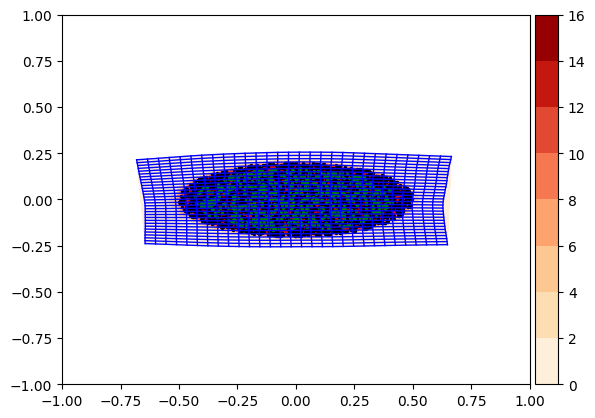

In [10]:
sampling_data = generate_ellipse(1000, (1, 1))

plot_generating_uniform_density(testNN, device, density_param, train_loader, sampling_data, grid_width=30,
                                x_range=(-1.5, 1.5), y_range=(-1.5, 1.5), x_lim=(-1,1), y_lim=(-1,1),
                                density_function=compute_uniform_circle_density)